<a href="https://colab.research.google.com/github/ChelseyCochrane/chelseys-repository/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Chelsey Cochrane 

*Intro to data analysis* 

**03/22/23**

In [2]:
# Importing relevant modules - specifically, pandas as pd, matplotlib.pyplot as plt, and scipy.stats as stats.

from matplotlib import pyplot as plt

import scipy.stats as stats

import pandas as pd

In [4]:
# Loading patch_seq_expanded.csv as a Pandas dataFrame called patch_seq.

df = 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'
patch_seq = pd.read_csv(df)

In [5]:
# Run following to get rid of empty values:

patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

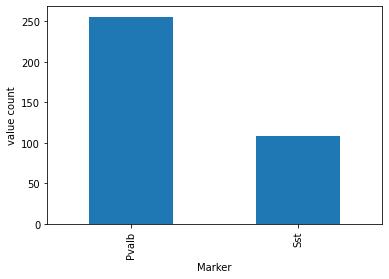

In [6]:
# Making a bar graph that displays the value counts (how many observations) from the "Marker" column of your patch_seq variable.

patch_seq['Marker'].value_counts().plot(kind = 'bar')
plt.xlabel('Marker')
plt.ylabel('value count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

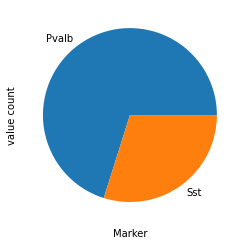

In [7]:
# Making a pie graph that displays the value counts (how many observations) from the "Marker" column of your patch_seq variable.

patch_seq['Marker'].value_counts().plot(kind = 'pie')
plt.xlabel('Marker')
plt.ylabel('value count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

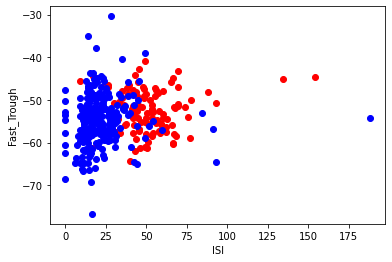

In [8]:
# Making a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your patch_seq dataframe.

patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "red")
  if patch_seq.iloc[i,2] == 'Pvalb':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "blue")

plt.xlabel('ISI')
plt.ylabel('Fast_Trough')
plt.show

In [9]:
# Creating a function called patchScatter() that will output the scatter plot created in step 6 when you call it. 

def patchScatter(): 
  for i in range(patch_length):
    if patch_seq.iloc[i,2] == 'Sst':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "red")
    if patch_seq.iloc[i,2] == 'Pvalb':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = "blue")

  plt.xlabel('ISI')
  plt.ylabel('Fast_Trough')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

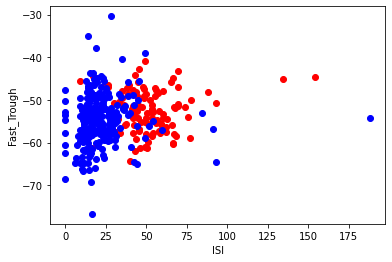

In [10]:
# Calling scatter plot

patchScatter()

In [11]:
# Returning the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons.

patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


# #10

P-valb has a smaller mean than SST. It also has a larger undershoot because the minimum goes all the way down to -76.687508. 

In [12]:
# Returning the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons.

patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

# #12

both Pvalb and Sst have normal distributions. 

In [13]:
# Returning the skewness of the "ISI" column for "Sst" neurons and "Pvalb" neurons.


patch_seq.groupby('Marker')['ISI'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,21.736253,16.269051,0.00,13.865085,18.350901,26.334931,187.986667
Sst,109.0,51.528430,19.698230,8.98,42.066957,49.844211,59.962667,154.140000


In [14]:
# Returning the skewness of the "ISI" column for "Sst" neurons and "Pvalb" neurons.


patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.200362
Sst      1.857850
Name: ISI, dtype: float64

In [15]:
# Performing a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. Doing this for our "Fast_Trough values."

sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

# #16

Since the p-value is less than 0.05, it shows that the data is significant. Thererfore, the undershoot value with significantly differ. 

In [16]:
# Performing a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. Doing this for our "ISI" values. 


sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])

Ttest_indResult(statistic=15.004913280678535, pvalue=6.160372584319923e-40)

# #18
the p-value is really tiny which shows that it is statiscally significant. Therefore, this demonstrates that the undershoots significantly differ.